# Import libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For drive access
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


# Load train data csv file

In [2]:
df = pd.read_csv('/content/drive/MyDrive/207/207-Project/notebooks/RG/3_species/train_val.csv')

df.head()

,primary_label,filename,type,filename_npy,rating,duration_secs_32000,country,continent,data
0,eaywag1,eaywag1/XC718442.ogg,blank,eaywag1/XC718442.npy,good,12.538781,FR,EUROPE,train
1,eaywag1,eaywag1/XC675682.ogg,call,eaywag1/XC675682.npy,good,35.657000,RU,EUROPE,train
2,eaywag1,eaywag1/XC722533.ogg,blank,eaywag1/XC722533.npy,good,58.104000,RU,EUROPE,train
3,eaywag1,eaywag1/XC673617.ogg,call,eaywag1/XC673617.npy,poor,18.756000,GB,EUROPE,train
4,eaywag1,eaywag1/XC675935.ogg,call,eaywag1/XC675935.npy,good,16.666000,RU,EUROPE,train


In [3]:
df['duration_mins'] = df['duration_secs_32000'] / 60
df.head()

,primary_label,filename,type,filename_npy,rating,duration_secs_32000,country,continent,data,duration_mins
0,eaywag1,eaywag1/XC718442.ogg,blank,eaywag1/XC718442.npy,good,12.538781,FR,EUROPE,train,0.208980
1,eaywag1,eaywag1/XC675682.ogg,call,eaywag1/XC675682.npy,good,35.657000,RU,EUROPE,train,0.594283
2,eaywag1,eaywag1/XC722533.ogg,blank,eaywag1/XC722533.npy,good,58.104000,RU,EUROPE,train,0.968400
3,eaywag1,eaywag1/XC673617.ogg,call,eaywag1/XC673617.npy,poor,18.756000,GB,EUROPE,train,0.312600
4,eaywag1,eaywag1/XC675935.ogg,call,eaywag1/XC675935.npy,good,16.666000,RU,EUROPE,train,0.277767


In [4]:
train = df[df['data'] == 'train']
train

,primary_label,filename,type,filename_npy,rating,duration_secs_32000,country,continent,data,duration_mins
0,eaywag1,eaywag1/XC718442.ogg,blank,eaywag1/XC718442.npy,good,12.538781,FR,EUROPE,train,0.208980
1,eaywag1,eaywag1/XC675682.ogg,call,eaywag1/XC675682.npy,good,35.657000,RU,EUROPE,train,0.594283
2,eaywag1,eaywag1/XC722533.ogg,blank,eaywag1/XC722533.npy,good,58.104000,RU,EUROPE,train,0.968400
3,eaywag1,eaywag1/XC673617.ogg,call,eaywag1/XC673617.npy,poor,18.756000,GB,EUROPE,train,0.312600
4,eaywag1,eaywag1/XC675935.ogg,call,eaywag1/XC675935.npy,good,16.666000,RU,EUROPE,train,0.277767
...,...,...,...,...,...,...,...,...,...,...
652,barswa,barswa/XC738298.ogg,blank,barswa/XC738298.npy,good,11.102031,DK,EUROPE,train,0.185034
653,barswa,barswa/XC282921.ogg,call,barswa/XC282921.npy,good,10.840813,ES,EUROPE,train,0.180680
654,barswa,barswa/XC659151.ogg,call,barswa/XC659151.npy,good,47.438375,PT,EUROPE,train,0.790640
655,barswa,barswa/XC54516.ogg,call,barswa/XC54516.npy,good,13.087344,NL,EUROPE,train,0.218122


In [5]:
val = df[df['data'] == 'val']
val

,primary_label,filename,type,filename_npy,rating,duration_secs_32000,country,continent,data,duration_mins
657,eaywag1,eaywag1/XC182483.ogg,call,eaywag1/XC182483.npy,good,21.072000,KZ,ASIA,val,0.351200
658,eaywag1,eaywag1/XC675723.ogg,call,eaywag1/XC675723.npy,good,83.330000,RU,EUROPE,val,1.388833
659,eaywag1,eaywag1/XC589278.ogg,call,eaywag1/XC589278.npy,good,13.320000,FR,EUROPE,val,0.222000
660,eaywag1,eaywag1/XC467878.ogg,call,eaywag1/XC467878.npy,poor,6.582000,BE,EUROPE,val,0.109700
661,eaywag1,eaywag1/XC634278.ogg,call,eaywag1/XC634278.npy,good,26.616000,PT,EUROPE,val,0.443600
...,...,...,...,...,...,...,...,...,...,...
935,barswa,barswa/XC571315.ogg,call,barswa/XC571315.npy,good,52.636750,GB,EUROPE,val,0.877279
936,barswa,barswa/XC192547.ogg,call,barswa/XC192547.npy,good,22.800000,UNKNOWN,UNKNOWN,val,0.380000
937,barswa,barswa/XC394763.ogg,call,barswa/XC394763.npy,good,37.642437,NL,EUROPE,val,0.627374
938,barswa,barswa/XC142794.ogg,both,barswa/XC142794.npy,good,71.758375,BE,EUROPE,val,1.195973


# visualize the distribution & location of species in training set

In [15]:
def distribution_plots(dataframe, sample_lim, duration_lim):

  colors = [
      '#ffa15a'
      ,'#636efa'
      ,'#ef553b'
  ]

  duration_sum_by_species = dataframe[['primary_label', 'duration_mins']].groupby('primary_label').sum('duration_mins').reset_index().sort_values('primary_label', ascending=False)
  value_counts_by_species = dataframe['primary_label'].value_counts().reset_index().sort_values('index', ascending=False)

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

  sns.barplot(x='primary_label', y='index', data=value_counts_by_species, palette=colors, ax=axes[0])
  axes[0].bar_label(axes[0].containers[0], fmt='%i', padding=3)
  axes[0].set(xlim=sample_lim)
  axes[0].set(ylabel='')
  axes[0].set(yticklabels=['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'])
  axes[0].set(xlabel='Number of Samples')

  # Plot the bar plot with swapped axes and assigned colors
  sns.barplot(x='duration_mins', y='primary_label', data=duration_sum_by_species, palette=colors, ax=axes[1])
  axes[1].bar_label(axes[1].containers[0], fmt='%i', padding=3)
  axes[1].set(xlim=duration_lim)
  axes[1].set(ylabel='')
  axes[1].set(yticklabels=['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'])
  axes[1].set(xlabel='Total Duration (minutes)')

  plt.tight_layout()

  plt.show()

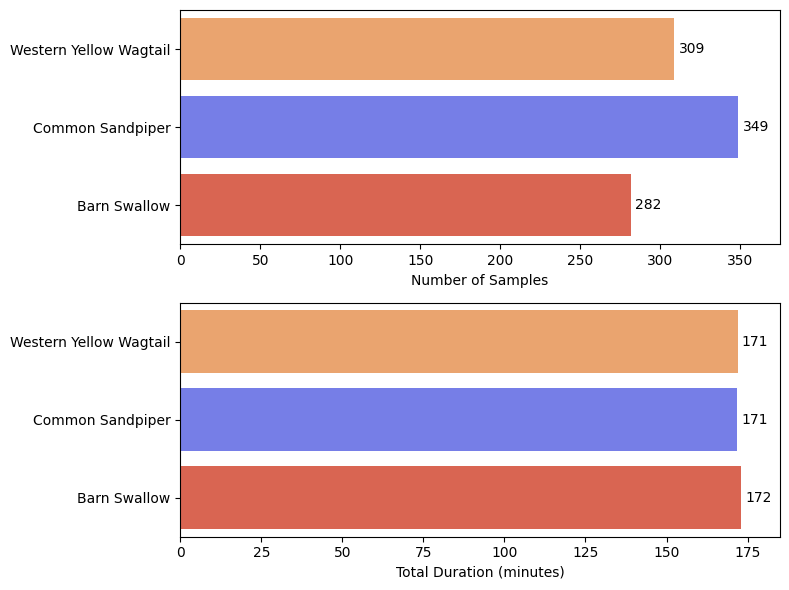

In [16]:
distribution_plots(df, sample_lim=[0,375], duration_lim=[0,185])

In [8]:
def train_val_plots(train_df, val_df):

  colors = [
      '#ffa15a'
      ,'#636efa'
      ,'#ef553b'
  ]

  train_duration_sum_by_species = train_df[['primary_label', 'duration_mins']].groupby('primary_label').sum('duration_mins').reset_index().sort_values('primary_label', ascending=False)
  train_value_counts_by_species = train_df['primary_label'].value_counts().reset_index().sort_values('index', ascending=False)

  val_duration_sum_by_species = val_df[['primary_label', 'duration_mins']].groupby('primary_label').sum('duration_mins').reset_index().sort_values('primary_label', ascending=False)
  val_value_counts_by_species = val_df['primary_label'].value_counts().reset_index().sort_values('index', ascending=False)

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

  sns.barplot(x='primary_label', y='index', data=train_value_counts_by_species, palette=colors, ax=axes[0][0])
  axes[0][0].bar_label(axes[0][0].containers[0], fmt='%i', padding=3)
  axes[0][0].set(xlim=[0,260])
  axes[0][0].set(ylabel='')
  axes[0][0].set(yticklabels=['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'])
  axes[0][0].set(xlabel='')

  sns.barplot(x='primary_label', y='index', data=val_value_counts_by_species, palette=colors, ax=axes[1][0])
  axes[1][0].bar_label(axes[1][0].containers[0], fmt='%i', padding=3)
  axes[1][0].set(xlim=[0,270])
  axes[1][0].set(ylabel='')
  axes[1][0].set(yticklabels=['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'])
  axes[1][0].set(xlabel='Number of Samples')


  sns.barplot(x='duration_mins', y='primary_label', data=train_duration_sum_by_species, palette=colors, ax=axes[0][1])
  axes[0][1].bar_label(axes[0][1].containers[0], fmt='%i', padding=3)
  axes[0][1].set(xlim=[0,135])
  axes[0][1].set(ylabel='')
  axes[0][1].set(yticklabels=[])
  axes[0][1].set(xlabel='')


  sns.barplot(x='duration_mins', y='primary_label', data=val_duration_sum_by_species, palette=colors, ax=axes[1][1])
  axes[1][1].bar_label(axes[1][1].containers[0], fmt='%i', padding=3)
  axes[1][1].set(xlim=[0,135])
  axes[1][1].set(ylabel='')
  axes[1][1].set(yticklabels=[])
  axes[1][1].set(xlabel='Total Duration (minutes)')

  plt.tight_layout()

  plt.show()

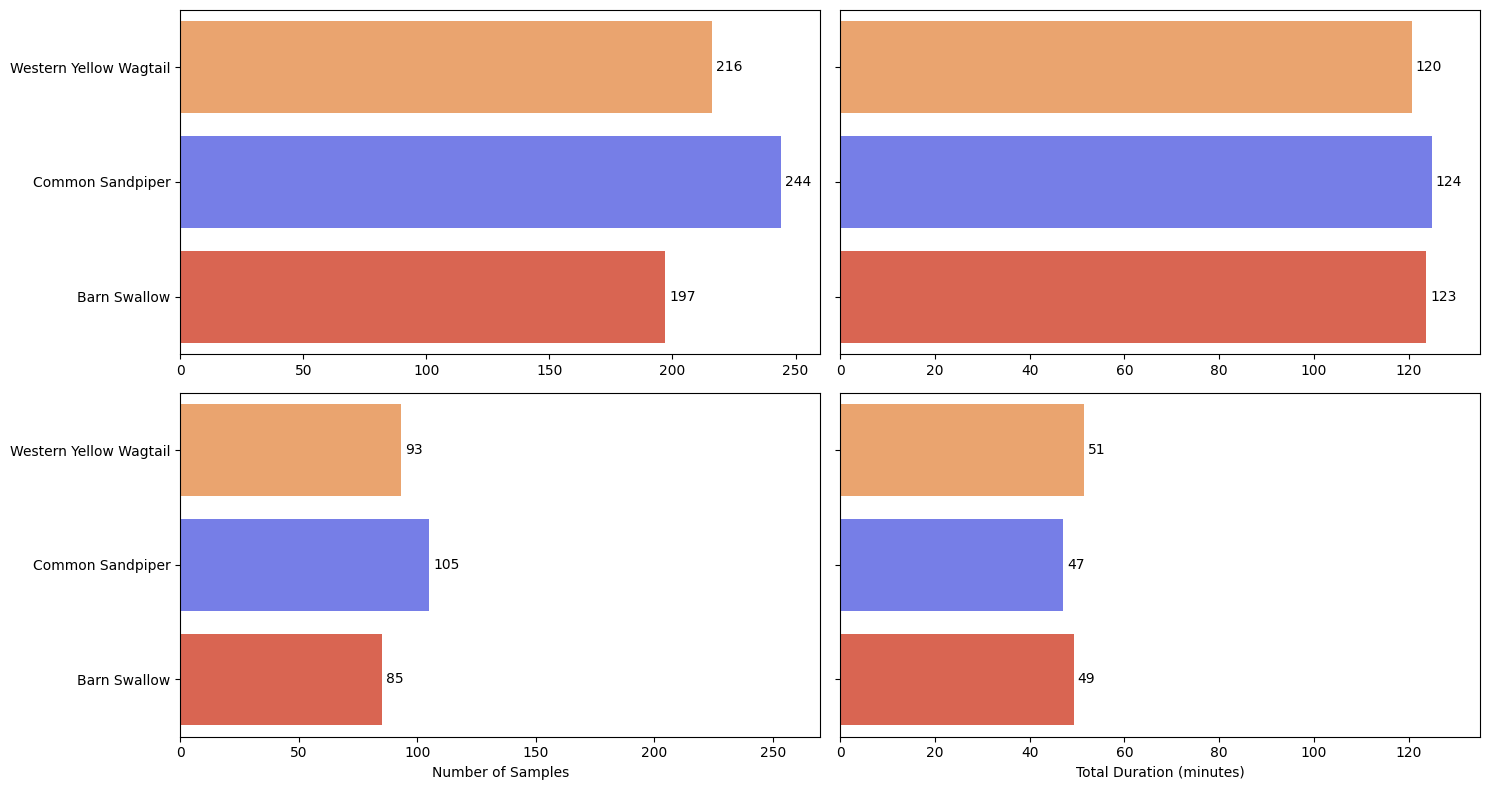

In [9]:
train_val_plots(train, val)

In [10]:
def eda_plots(dataframe):

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))


  grouped_type_df = dataframe.groupby(['primary_label', 'type']).sum('duration_mins').reset_index().sort_values('primary_label', ascending=False)
  sns.barplot(x='primary_label', y='duration_mins', hue='type', data=grouped_type_df, ax=axes[0])
  axes[0].bar_label(axes[0].containers[0], fmt='%i', padding=3)
  axes[0].bar_label(axes[0].containers[1], fmt='%i', padding=3)
  axes[0].bar_label(axes[0].containers[2], fmt='%i', padding=3)
  axes[0].bar_label(axes[0].containers[3], fmt='%i', padding=3)
  axes[0].set(title='Total Duration (Mins) by Call Type')
  axes[0].set(xlabel='')
  axes[0].set(ylabel='')
  axes[0].set(ylim=[0,105])
  axes[0].set_xticklabels(['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'], rotation=45, ha='right')

  grouped_rating_df = dataframe.groupby(['primary_label', 'rating']).sum('duration_mins').reset_index().sort_values('primary_label', ascending=False)
  sns.barplot(x='primary_label', y='duration_mins', hue='rating', data=grouped_rating_df, ax=axes[1])
  axes[1].bar_label(axes[1].containers[0], fmt='%i', padding=3)
  axes[1].bar_label(axes[1].containers[1], fmt='%i', padding=3)
  axes[1].set(title='Total Duration (Mins) by Quality Rating')
  axes[1].set(xlabel='')
  axes[1].set(ylabel='')
  axes[1].set(ylim=[0,123])
  axes[1].legend(loc='right')
  axes[1].set_xticklabels(['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'], rotation=45, ha='right')

  grouped_continent_df = dataframe.groupby(['primary_label', 'continent']).size().reset_index(name='Count')
  pivot_continent_df = grouped_continent_df.pivot(index='continent', columns='primary_label', values='Count')
  sns.heatmap(pivot_continent_df, cmap='YlGnBu', annot=True, fmt='g', cbar=True, ax=axes[2])
  axes[2].set(title='Number of Samples by Continent')
  axes[2].set(xlabel='')
  axes[2].set(ylabel='')
  axes[2].set_xticklabels(['Western Yellow Wagtail', 'Common Sandpiper', 'Barn Swallow'], rotation=45, ha='right')
  axes[2].set_yticklabels(axes[2].get_yticklabels(), rotation=45, ha='right')

  plt.tight_layout()

  plt.show()

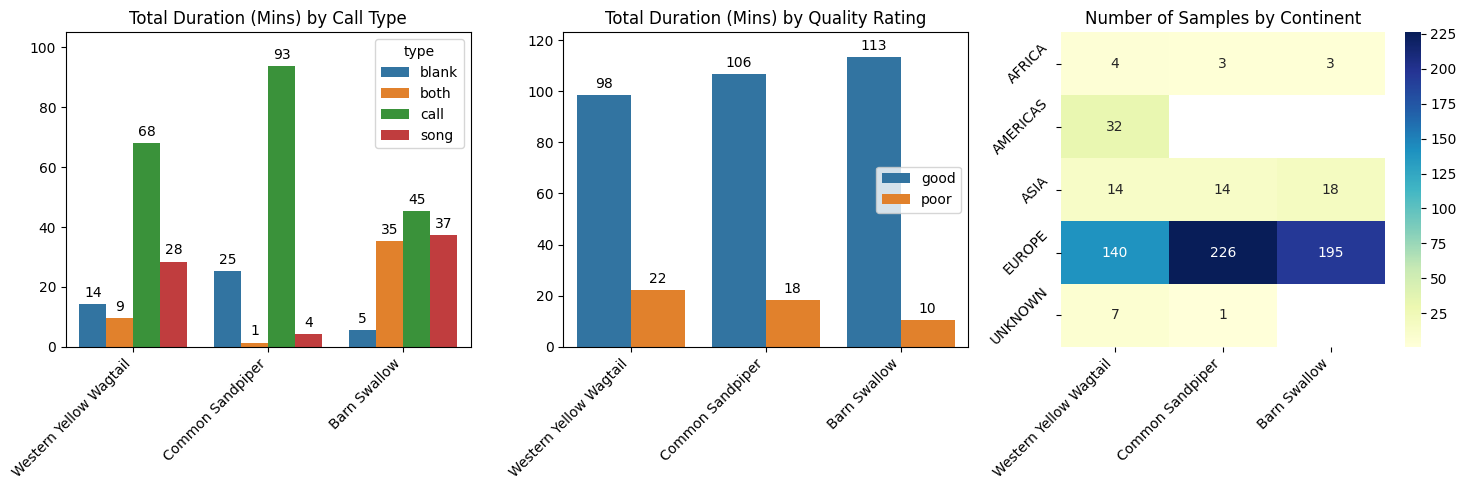

In [11]:
eda_plots(train)

# Load test data csv file

In [12]:
test = pd.read_csv('/content/drive/MyDrive/207/207-Project/Inference/test.csv')

test.head()

,primary_label,filename,duration_secs,type,filename_npy,rating,country,continent
0,eaywag1,eaywag1/XC131436.ogg,14.027755,call,eaywag1/XC131436.npy,good,FR,EUROPE
1,eaywag1,eaywag1/XC132637.ogg,40.359229,call,eaywag1/XC132637.npy,good,PL,EUROPE
2,eaywag1,eaywag1/XC133615.ogg,13.505351,call,eaywag1/XC133615.npy,poor,RU,EUROPE
3,eaywag1,eaywag1/XC138886.ogg,54.987755,song,eaywag1/XC138886.npy,poor,RU,EUROPE
4,eaywag1,eaywag1/XC145084.ogg,10.605760,call,eaywag1/XC145084.npy,good,KZ,ASIA


In [13]:
test['duration_mins'] = test['duration_secs'] / 60
test.head()

,primary_label,filename,duration_secs,type,filename_npy,rating,country,continent,duration_mins
0,eaywag1,eaywag1/XC131436.ogg,14.027755,call,eaywag1/XC131436.npy,good,FR,EUROPE,0.233796
1,eaywag1,eaywag1/XC132637.ogg,40.359229,call,eaywag1/XC132637.npy,good,PL,EUROPE,0.672654
2,eaywag1,eaywag1/XC133615.ogg,13.505351,call,eaywag1/XC133615.npy,poor,RU,EUROPE,0.225089
3,eaywag1,eaywag1/XC138886.ogg,54.987755,song,eaywag1/XC138886.npy,poor,RU,EUROPE,0.916463
4,eaywag1,eaywag1/XC145084.ogg,10.605760,call,eaywag1/XC145084.npy,good,KZ,ASIA,0.176763


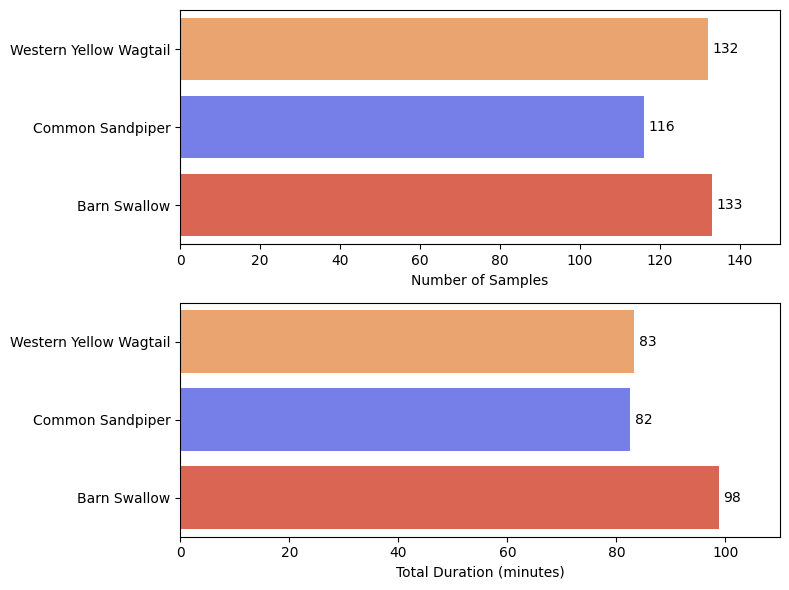

In [18]:
distribution_plots(test, sample_lim=[0,150], duration_lim=[0,110])